# Network graphs
* **[v]** To install a library for network analysis (NetworkX or any other)
* **[v]** A picture of the graph of a network: nodes of a graph would be actors, edges would be their connections.
* **[v]** Every node should have a label (actor name)
* **[v]** Every edge should have a label (movie distance number, if it is less the infinity)
* **[v]** Edges for different movie distances should be of different colours. For example, red colour for edges for movie distances equal to 1, green colour - for movie distance equal to 2, and so on.
* **[v]** Additionally, we want a plot, where only edges for movie distance equal to 1 will be visualised. Then a different plot, but for edges for movie distances equal to 2. And so on.
* **[v]** All plots should be presented in jupyter notebook.

In [1]:
import json
import networkx as nx
import pandas as pd
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

**I added an additional file 'highest_paid_actors.json' to the archive in case you want to play this notebook.**<br>
This is the data that I collected after executing the "get_movie_distance" function in pairs for each actor.

In [2]:
with open('highest_paid_actors.json') as f:
    highest_paid_actors = json.load(f)
highest_paid_actors

[['Dwayne Johnson', 'Chris Hemsworth', 2],
 ['Dwayne Johnson', 'Robert Downey Jr.', 3],
 ['Dwayne Johnson', 'Akshay Kumar', 'inf'],
 ['Dwayne Johnson', 'Jackie Chan', 'inf'],
 ['Dwayne Johnson', 'Bradley Cooper', 3],
 ['Dwayne Johnson', 'Adam Sandler', 3],
 ['Dwayne Johnson', 'Scarlett Johansson', 3],
 ['Dwayne Johnson', 'Sofia Vergara', 'inf'],
 ['Dwayne Johnson', 'Chris Evans', 3],
 ['Chris Hemsworth', 'Dwayne Johnson', 2],
 ['Chris Hemsworth', 'Robert Downey Jr.', 1],
 ['Chris Hemsworth', 'Akshay Kumar', 3],
 ['Chris Hemsworth', 'Jackie Chan', 2],
 ['Chris Hemsworth', 'Bradley Cooper', 2],
 ['Chris Hemsworth', 'Adam Sandler', 3],
 ['Chris Hemsworth', 'Scarlett Johansson', 1],
 ['Chris Hemsworth', 'Sofia Vergara', 3],
 ['Chris Hemsworth', 'Chris Evans', 1],
 ['Robert Downey Jr.', 'Dwayne Johnson', 3],
 ['Robert Downey Jr.', 'Chris Hemsworth', 1],
 ['Robert Downey Jr.', 'Akshay Kumar', 'inf'],
 ['Robert Downey Jr.', 'Jackie Chan', 3],
 ['Robert Downey Jr.', 'Bradley Cooper', 3],
 ['Ro

We will write this data to the 'csv' file.

However, in order to complete the task of plotting, this data needs to be slightly transformed, since there is one small problem.

Since our task has a specific way of collecting distances between actors:
* we study not all the films in which the actor played, but only the last 5 films
* we are not considering all the actors who played in the film, but only those who played the top 5 roles
* if the relationship between two actors is greater than 3, then there is no relationship between the actors

That is, there is such an opportunity when there is an actor Y for actor X, and there is no actor X for actor Y.

Let's look, for example, at the pair "Dwayne Johnson" - "Jackie Chan" from the output above.
For Johnson, the distance with Chan is not found, while for Chan it is 3.

**To solve this problem**, we calculate the minimum pairwise distance from the available data and record it for each pair.

In [3]:
df1 = pd.DataFrame(data=highest_paid_actors, columns=['from', 'to', 'distance'])
# df1.to_csv('movie_distances.csv', index=False)
df1 = df1.replace('inf', np.inf)
df2 = df1.reindex(columns=['to', 'from', 'distance'])
df2.columns = ['from', 'to', 'distance']
df = pd.concat([df1, df2], axis=0)
df['final_distance'] = df.groupby(by=['from', 'to'])['distance'].transform(lambda s: np.min(s.values))
df = df.drop(['distance'], axis=1).drop_duplicates()
df = df.values.tolist()

Now we can verify this by looking at the same example

In [4]:
df

[['Dwayne Johnson', 'Chris Hemsworth', 2.0],
 ['Dwayne Johnson', 'Robert Downey Jr.', 3.0],
 ['Dwayne Johnson', 'Akshay Kumar', inf],
 ['Dwayne Johnson', 'Jackie Chan', 3.0],
 ['Dwayne Johnson', 'Bradley Cooper', 3.0],
 ['Dwayne Johnson', 'Adam Sandler', 3.0],
 ['Dwayne Johnson', 'Scarlett Johansson', 2.0],
 ['Dwayne Johnson', 'Sofia Vergara', 3.0],
 ['Dwayne Johnson', 'Chris Evans', 2.0],
 ['Chris Hemsworth', 'Dwayne Johnson', 2.0],
 ['Chris Hemsworth', 'Robert Downey Jr.', 1.0],
 ['Chris Hemsworth', 'Akshay Kumar', 3.0],
 ['Chris Hemsworth', 'Jackie Chan', 2.0],
 ['Chris Hemsworth', 'Bradley Cooper', 1.0],
 ['Chris Hemsworth', 'Adam Sandler', 3.0],
 ['Chris Hemsworth', 'Scarlett Johansson', 1.0],
 ['Chris Hemsworth', 'Sofia Vergara', 3.0],
 ['Chris Hemsworth', 'Chris Evans', 1.0],
 ['Robert Downey Jr.', 'Dwayne Johnson', 3.0],
 ['Robert Downey Jr.', 'Chris Hemsworth', 1.0],
 ['Robert Downey Jr.', 'Akshay Kumar', inf],
 ['Robert Downey Jr.', 'Jackie Chan', 3.0],
 ['Robert Downey Jr.',

Everything is ready.

Now let's build a graph of the network of the highest paid actors of 2019

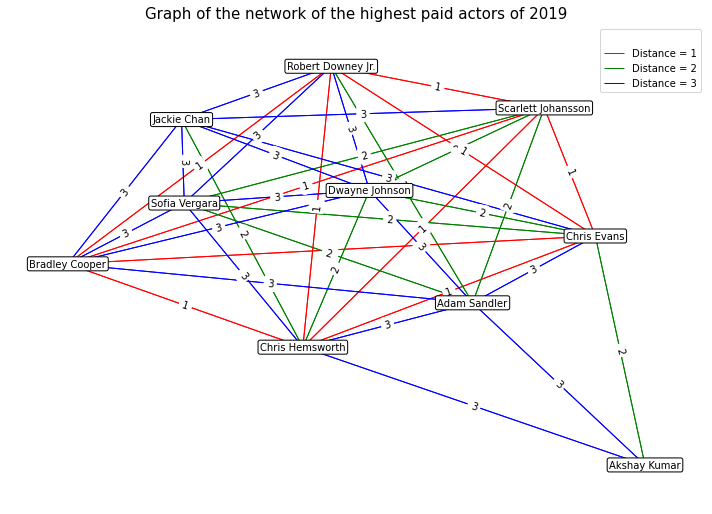

In [5]:
G = nx.Graph()

one = []
two = []
tree = []
for sublist in df:
    if sublist[2] == np.inf:
        continue
    elif sublist[2] == 1:
        one.append((sublist[0], sublist[1]))
    elif sublist[2] == 2:
        two.append((sublist[0], sublist[1]))
    elif sublist[2] == 3:
        tree.append((sublist[0], sublist[1]))
    G.add_edge(sublist[0], sublist[1], weight=int(sublist[2]))

# pos = nx.kamada_kawai_layout(G)
pos = nx.spring_layout(G, seed=17)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=150, node_color='white', node_shape='o')

# edges
nx.draw_networkx_edges(G, pos, edgelist=one, width=1, edge_color="red")
nx.draw_networkx_edges(G, pos, edgelist=two, width=1, edge_color="green")
nx.draw_networkx_edges(G, pos, edgelist=tree, width=1, edge_color="blue")

# node labels
d = dict(facecolor="white", edgecolor='black', boxstyle='round,pad=0.2')
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif", bbox=d)#, font_weight='bold')

# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)


ax = plt.gcf()
ax.set_size_inches(10,7, forward=True)
plt.axis("off")
plt.tight_layout()
plt.legend([None, 'Distance = 1', 'Distance = 2', 'Distance = 3'])
plt.title('Graph of the network of the highest paid actors of 2019', fontsize=15)
plt.show()

Now let's write a function for constructing a graph of certain distances

In [6]:
def display_graph_separately(dist):
    G = nx.Graph()
    l = []
    for sublist in df:
        if sublist[2] == dist:
            l.append((sublist[0], sublist[1]))
            G.add_edge(sublist[0], sublist[1], weight=int(sublist[2]))
    pos = nx.spring_layout(G, seed=0)
    nx.draw_networkx_nodes(G, pos, node_size=150, node_color='white', node_shape='o')
    ed = {1: 'red', 2: 'green', 3: 'blue'}
    nx.draw_networkx_edges(G, pos, edgelist=l, width=1, edge_color=ed[dist])
    d = dict(facecolor="white", edgecolor='black', boxstyle='round,pad=0.2')
    nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif", bbox=d)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels)
    ax = plt.gcf()
    ax.set_size_inches(10,6, forward=True)
    plt.axis("off")
    plt.tight_layout()
    plt.title(f'Graph of the network of the highest paid actors of 2019 with distance {dist}', fontsize=15)
    plt.show()

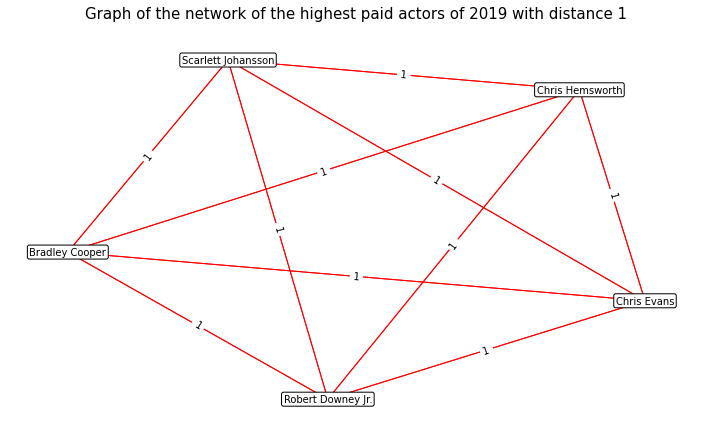

------------------------------------------------------------------------------------------


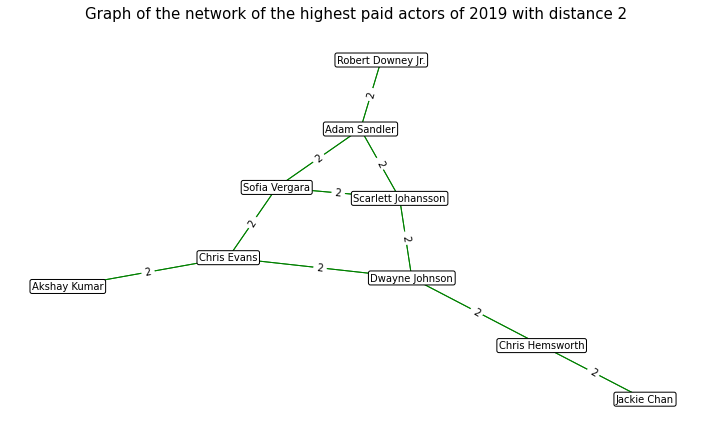

------------------------------------------------------------------------------------------


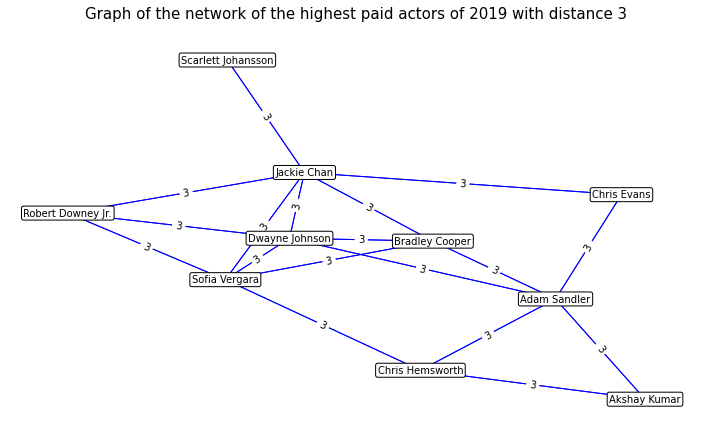

------------------------------------------------------------------------------------------


In [7]:
for dist in range(3):
    display_graph_separately(dist+1)
    print('-' * 90)

# Wordcloud

* **[v]** Final report in jupyter notebook format contains a code, that for every actor reads movie descriptions, preprocess it (concatenation, getting rid of stopword) and prints out a wordcloud. So, we have 10 wordclouds overall.

To do this, we will write a function that displays word clouds. A list of text file names will be sent to the input.

In [8]:
def display_wordcloud(list_of_name_text_files):
    stopwords = set(STOPWORDS)
    pic_box = plt.figure(figsize=(16,10))
    for i, file in enumerate(list_of_name_text_files):
        with open(file, 'r') as f:
            text = f.read()
        wc = WordCloud(background_color="white", max_words=1000, width=1300, height=600,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')
        wc.generate(text)
        pic_box.add_subplot(4,3,i+1)
        plt.imshow(wc, interpolation='bilinear')
        plt.title(file[:-4], fontsize=15)
        plt.axis('off')
    plt.show()

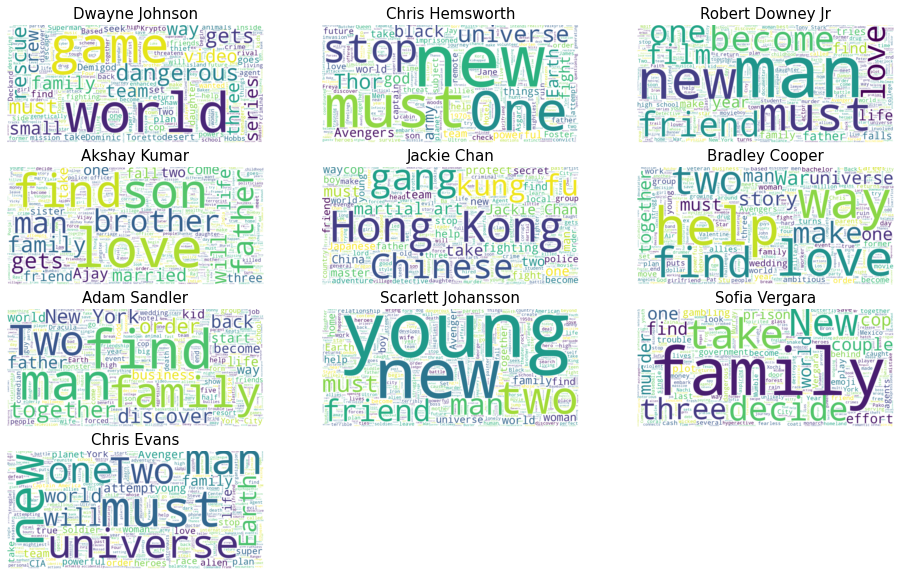

In [9]:
list_of_name_text_files = [
    'Dwayne Johnson.txt',
    'Chris Hemsworth.txt',
    'Robert Downey Jr.txt',
    'Akshay Kumar.txt',
    'Jackie Chan.txt',
    'Bradley Cooper.txt',
    'Adam Sandler.txt',
    'Scarlett Johansson.txt',
    'Sofia Vergara.txt',
    'Chris Evans.txt'
]

display_wordcloud(list_of_name_text_files)